In [1]:
import tensorflow as tf
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [49]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [50]:
x_train.shape

(60000, 28, 28)

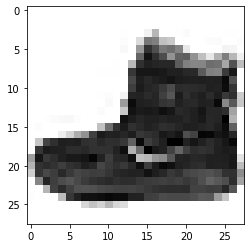

In [51]:
plt.imshow(x_train[0],cmap= plt.cm.binary)

In [52]:
y_train = to_categorical(y_train , num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

In [54]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [55]:
y_train.shape

(60000, 10)

In [70]:
model = Sequential([
    Dense(784, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=128,validation_data=(x_test,y_test),workers=-1)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 2.0633 - accuracy: 0.7337 - val_loss: 0.8876 - val_accuracy: 0.8038
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.7558 - accuracy: 0.8144 - val_loss: 0.6030 - val_accuracy: 0.8343
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6388 - accuracy: 0.8254 - val_loss: 0.5357 - val_accuracy: 0.8461
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.5976 - accuracy: 0.8321 - val_loss: 0.5117 - val_accuracy: 0.8558
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5731 - accuracy: 0.8379 - val_loss: 0.5273 - val_accuracy: 0.8437
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5559 - accuracy: 0.8430 - val_loss: 0.4897 - val_accuracy: 0.8625
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.5448 - accuracy: 0.8448 - val_loss: 0.4874 - val_accuracy: 0.8577

Epoch 58/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4179 - accuracy: 0.8829 - val_loss: 0.4107 - val_accuracy: 0.8799
Epoch 59/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4137 - accuracy: 0.8804 - val_loss: 0.4159 - val_accuracy: 0.8787
Epoch 60/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4152 - accuracy: 0.8820 - val_loss: 0.4164 - val_accuracy: 0.8804
Epoch 61/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4144 - accuracy: 0.8820 - val_loss: 0.4094 - val_accuracy: 0.8793
Epoch 62/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4188 - accuracy: 0.8793 - val_loss: 0.4300 - val_accuracy: 0.8750
Epoch 63/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4161 - accuracy: 0.8810 - val_loss: 0.4335 - val_accuracy: 0.8759
Epoch 64/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4169 - accuracy: 0.8813 - val_loss: 0.4212 - val_accuracy:

In [71]:

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(784, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(x_train.reshape(60000,28,28,1), y_train, epochs=20,
           batch_size=128,validation_data=(x_test.reshape(10000,28,28,1),y_test),workers=-1)

Epoch 1/20
469/469 [==============================] - 67s 142ms/step - loss: 1.8403 - accuracy: 0.7837 - val_loss: 0.9778 - val_accuracy: 0.8129
Epoch 2/20
469/469 [==============================] - 66s 141ms/step - loss: 0.5854 - accuracy: 0.8674 - val_loss: 0.4644 - val_accuracy: 0.8877
Epoch 3/20
469/469 [==============================] - 66s 142ms/step - loss: 0.4837 - accuracy: 0.8822 - val_loss: 0.4477 - val_accuracy: 0.8868
Epoch 4/20
469/469 [==============================] - 66s 142ms/step - loss: 0.4509 - accuracy: 0.8919 - val_loss: 0.4263 - val_accuracy: 0.8913
Epoch 5/20
469/469 [==============================] - 67s 142ms/step - loss: 0.4270 - accuracy: 0.8978 - val_loss: 0.4005 - val_accuracy: 0.9006
Epoch 6/20
469/469 [==============================] - 67s 142ms/step - loss: 0.4154 - accuracy: 0.9021 - val_loss: 0.3921 - val_accuracy: 0.9073
Epoch 7/20
469/469 [==============================] - 66s 142ms/step - loss: 0.4003 - accuracy: 0.9081 - val_loss: 0.4348 - val_ac

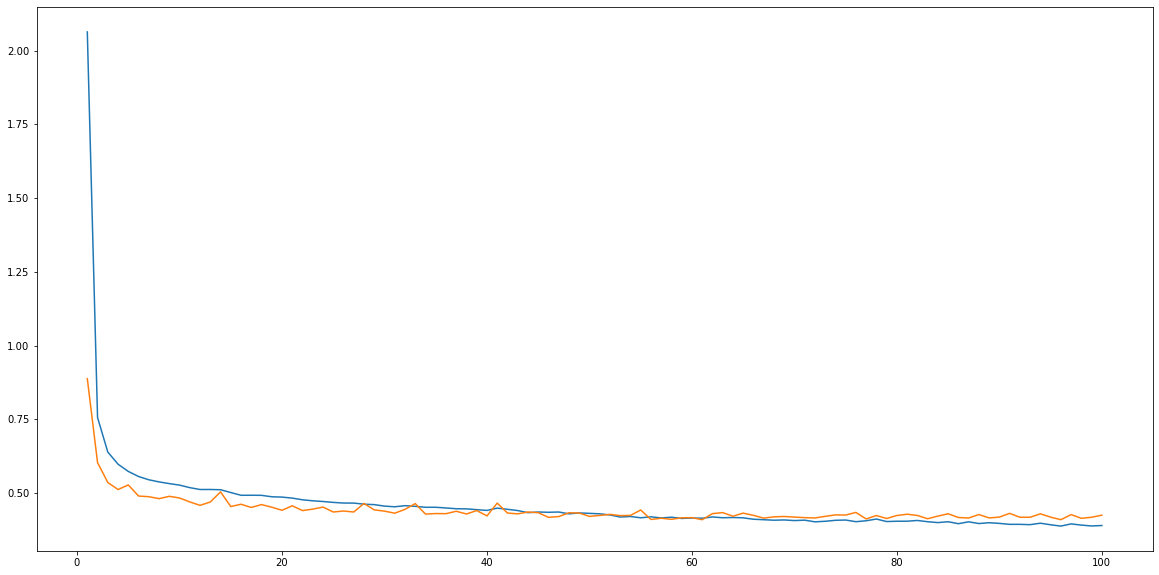

In [84]:
plt.figure(figsize=(20,10))
plt.plot(range(1,101),model.history.history['loss'])
plt.plot(range(1,101),model.history.history['val_loss'])
plt.show()

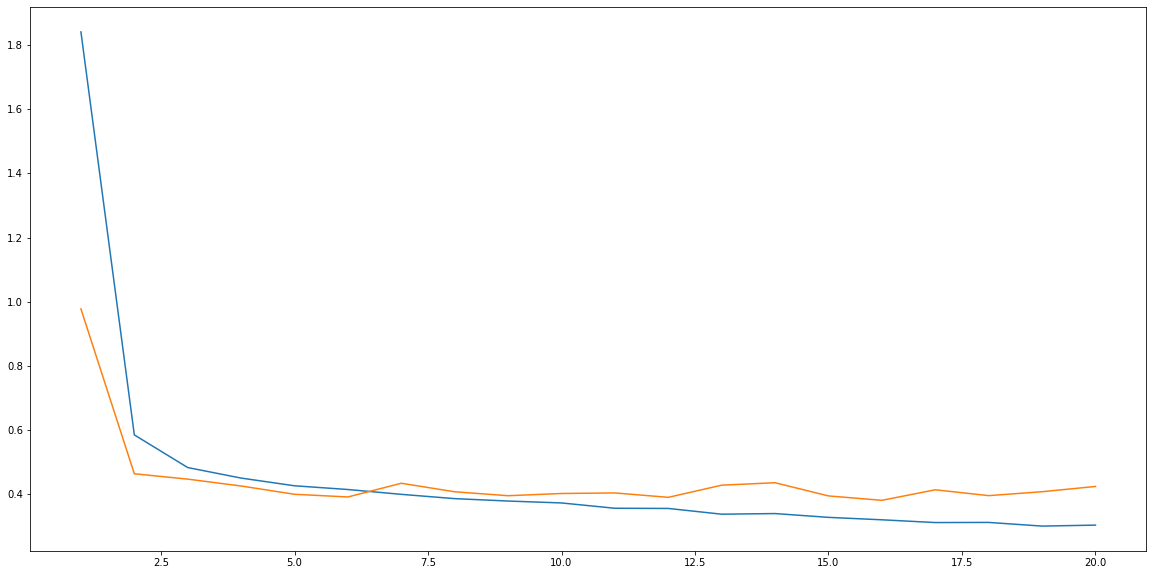

In [82]:
plt.figure(figsize=(20,10))
plt.plot(range(1,21),model2.history.history['loss'])
plt.plot(range(1,21),model2.history.history['val_loss'])
plt.show()

In [85]:
del x_test,x_train,y_test,y_train

In [2]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [100]:
# xtrain = xtrain / 255.0
# xtest = xtest / 255.0

In [3]:
def add_noise(images, noise_factor):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)  # Clip values to the range [0, 1]
    return noisy_images

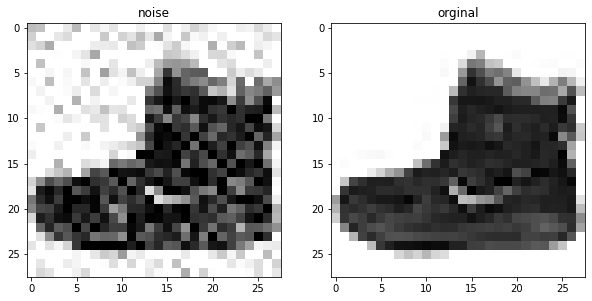

In [4]:
fig ,axs = plt.subplots(1,2,figsize=(10,10))

axs[0].set_title('noise')
axs[0].imshow(add_noise(xtrain[0]/255,noise_factor=0.15),
          cmap=plt.cm.binary )

axs[1].set_title('orginal')
axs[1].imshow(xtrain[0],cmap=plt.cm.binary)

In [5]:
xTrainNoise = np.array([add_noise(x,noise_factor=0.15) for x in xtrain])
xTestNoise = np.array([add_noise(x,noise_factor=0.15) for x in xtest])

In [12]:
xTrainNoise.reshape(60000,784)

(60000, 784)

In [23]:
model = Sequential([
    Dense(784, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128*2, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128*4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128*8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(784, activation='relu')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(xTrainNoise.reshape(60000,784), xtrain.reshape(60000,784),
           epochs=20,batch_size=128,
           validation_data=(xTestNoise.reshape(10000,784) , xtest.reshape(10000,784)),workers=-1)

Epoch 1/20
469/469 [==============================] - 9s 18ms/step - loss: 7322.2231 - accuracy: 0.0176 - val_loss: 5982.1597 - val_accuracy: 0.0136
Epoch 2/20
469/469 [==============================] - 8s 18ms/step - loss: 5724.5664 - accuracy: 0.0142 - val_loss: 4656.1890 - val_accuracy: 0.0195
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 3844.9570 - accuracy: 0.0120 - val_loss: 3097.7837 - val_accuracy: 0.0152
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 3097.4414 - accuracy: 0.0115 - val_loss: 2663.1445 - val_accuracy: 0.0196
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 2860.6411 - accuracy: 0.0123 - val_loss: 2521.8425 - val_accuracy: 0.0128
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 2760.3474 - accuracy: 0.0114 - val_loss: 2451.4788 - val_accuracy: 0.0144
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 2691.9917 - accuracy: 0.0120 - 

In [37]:
predicts = model.predict(xTestNoise.reshape(10000,784))

313/313 [==============================] - 1s 3ms/step


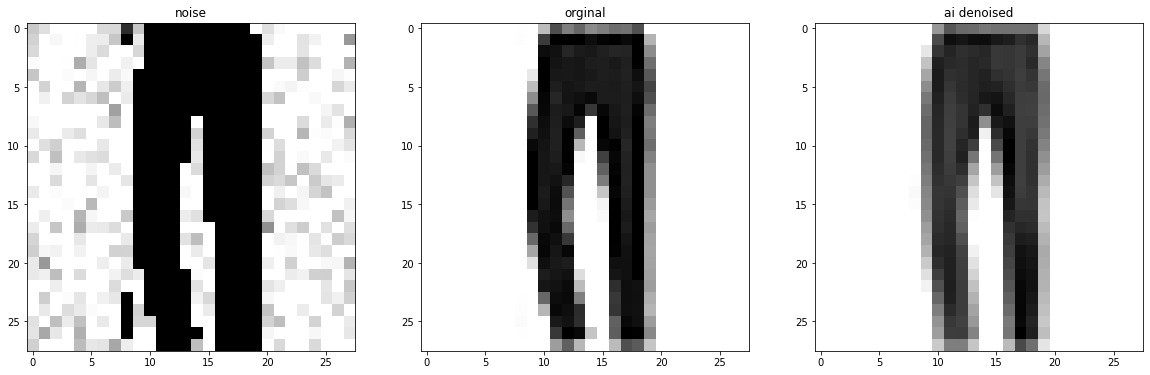

In [52]:
fig ,axs = plt.subplots(1,3,figsize=(20,10))

axs[0].set_title('noise')
axs[0].imshow(xTestNoise.reshape(10000,28,28)[2],cmap=plt.cm.binary)

axs[1].set_title('orginal')
axs[1].imshow(xtest.reshape(10000,28,28)[2],cmap=plt.cm.binary)

axs[2].set_title('ai denoised')
axs[2].imshow(predicts[2].reshape(28,28),cmap=plt.cm.binary)
